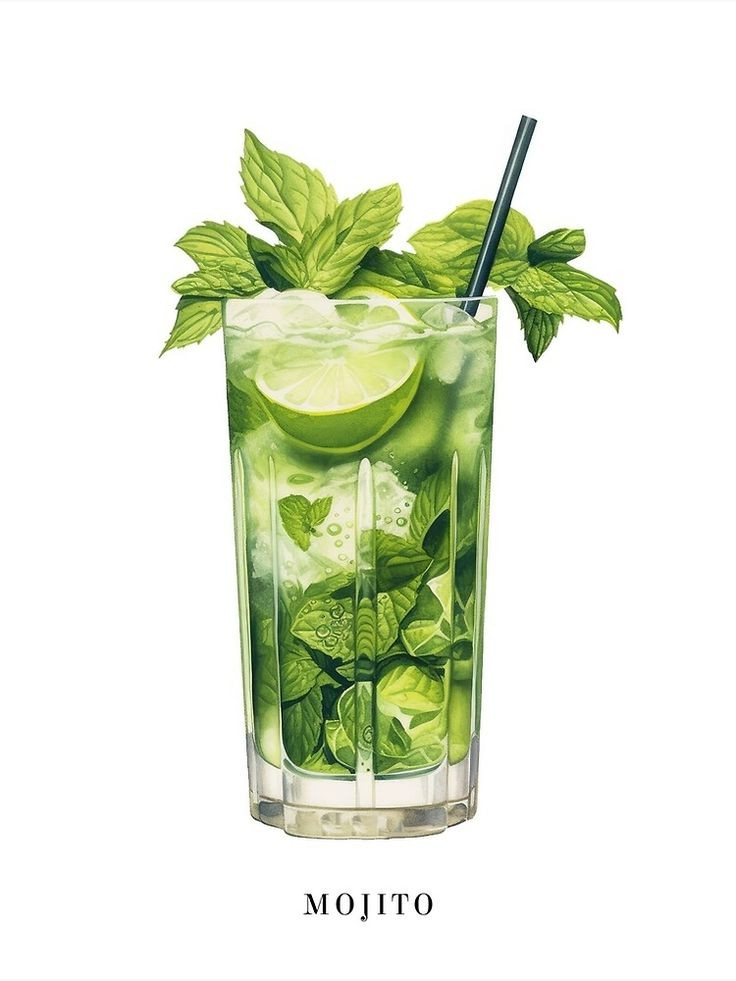

In [129]:
from IPython.display import display, Image
img = Image(filename= "C:\\Users\\flaco\\Documents\\GitHub\\Universidad-MATCOM\\Proyecto_Restaurantes_Bares\\Jupyter\\6fd50496a41e68cf24b5e3883ebd4c76.jpg" )
display(img)

"Aventura de sabores"

En un balcon de La Habana Vieja vive Carlos, un chico apasionado por la comida criolla y las bebidas refrescantes y aunque Carlos adora tomar jugo de guayaba preparado por su vecina (de la que secretamente esta enamorado) un dia se encomienda en un viaje por toda la provincia para asi conseguir responder aquella pregunta que lo dejo pensando la noche anterior.
*¿En que municipio podre encontrar la mejor oferta de bebidas tradicionales?*

Asi Carlos se propone analizar 4 cocteles, El Mojito, La piña colada, El Daiquiri y El Cuba Libre.

In [130]:
import json
import os
import numpy as nd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

def alm(archivo):
    paths = {}
    for i in os.listdir(archivo):
        paths[i.replace(".json","")] = os.path.join(archivo,i)
    return paths

def call(key:str,data:dict[str]):
    with open(data[key]) as json_archivo:
        data = json.load(json_archivo)
    return data

In [131]:
json_dir = '../Json'
data = alm(json_dir)

for archivo in data:
    data[archivo] = call(archivo, data)


La Habana, la capital de todos los cubanos ciertamente es la provincia con mas densidad de habitantes, sera esta una de las razones por las que podemos encontar una gran cantidad de restaurantes y bares. Carlos visito los 15 municipios que componen a la provincia con el objetivo de obtener los datos necesarios para el analisis que realizaria. El mas importante de los datos sin duda fue la carta de la que recopilaria el precio de los tragos, aunque fue toda una osadia. Un viaje que tuvo que hacer en dias distintos e incluso se encontro con personas que lo corrieron de los locales, aun asi pudo obtener una muestra de 231 restaurantes.

In [132]:
Datagrupada = {}

for archivo in data:
    if not (data[archivo]["Location"]["District"] + "," + data[archivo]["Ownership"] in  Datagrupada):
        Datagrupada[data[archivo]["Location"]["District"] + "," + data[archivo]["Ownership"]]  = 1
    else:
        Datagrupada[data[archivo]["Location"]["District"] + "," + data[archivo]["Ownership"]]  += 1

Distrito = []
Propiedad = []
Contador = []
for elemento in Datagrupada:
    Distrito.append(elemento.split(",")[0])
    Propiedad.append(elemento.split(",")[1])
    Contador.append(Datagrupada[elemento])

df = pd.DataFrame({
    "Municipio": Distrito,
    "Propiedad": Propiedad,
    "Contador": Contador
})

In [133]:
fig = px.bar(df, x = "Municipio", y = "Contador" , color = "Propiedad")
fig.show()

Carlos pudo observar que existia una variacion en cuanto a la propiedad de los locales, siendo la mayor parte particulares. Los establecimientos estatales a pesar de no igualar en numero a la propiedad privada sigue manteniendo un gran numero representativo. 
Se encontro con un dato curioso y es que en el municipio de Plaza pudo encontrar otros tipos de propiedad. Estas representaban la minima parte de la muestra pero aun asi tiene un peso significativo como es el "Proyecto de desarrollo local" que involucra directamente a la comunidad y busca apoyar al progreso de la zona.
Pero a pesar de ser una muestra amplia de locales pronto Carlos pudo observar que no en todos ellos se ofertaban las bebidas que deseaba analizar.

In [134]:
Datagrupada = {}
for archivo in data:
    for drink in data[archivo]["Menu"]["Beverages"]:
        if drink == "Pinha colada" or drink == "Mojito" or drink == "Daiquiri" or drink == "Cuba libre":

            if not (data[archivo]["Location"]["District"] + "," + data[archivo]["Ownership"] in  Datagrupada):
                Datagrupada[data[archivo]["Location"]["District"] + "," + data[archivo]["Ownership"]]  = 1
            else:
                Datagrupada[data[archivo]["Location"]["District"] + "," + data[archivo]["Ownership"]]  += 1

Distrito = []
Propiedad = []
Contador = []
for elemento in Datagrupada:
    Distrito.append(elemento.split(",")[0])
    Propiedad.append(elemento.split(",")[1])
    Contador.append(Datagrupada[elemento])

df2 = pd.DataFrame({
    "Municipio": Distrito,
    "Propiedad": Propiedad,
    "Contador": Contador
})

*¿En cual municipio se ofertan mas estos cocteles?*

*¿Cual es el tipo de propiedad que predomina?*

In [135]:
fig = px.bar(df2, x = "Municipio", y = "Contador" , color = "Propiedad")
fig.show()

En un nuevo analisis Carlos pudo visualizar que los municipios de Playa, Plaza y la Habana Vieja ofrecen con mas frecuencia al menos uno de los cocteles, a diferencia de municipios mas apartados de las zonas turisticas como son La Lisa, Regla y Guanabacoa. Tambien pudo notar como en la mayor parte de los municipios la mayoria de los locales pertenecen a la propiedad particular, siendo esta la que mas predomina en la muestra. La Habana Vieja es la que marca la diferencia siendo que hay una gran cantidad de locales estatales con estos cocteles

In [136]:
Cocteles = {
    "Pinha colada": 0,
    "Daiquiri": 0,
    "Mojito": 0,
    "Cuba libre": 0
}

validas = ["Pinha colada",
    "Daiquiri",
    "Mojito",
    "Cuba libre"]

for archivo in data:
    for drink in data[archivo]["Menu"]['Beverages']:
        if drink in validas:
            Cocteles[drink] += 1

Bebidas =[]
Cantidad = []

for elemento in Cocteles:
    Bebidas.append(elemento.split(",")[0])
    Cantidad.append(Cocteles[elemento])

*¿Cual es la bebida que mas se oferta en la carta?*

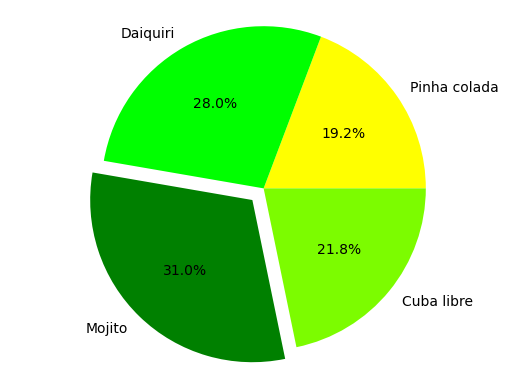

In [137]:
colores = ["yellow", "lime", "green", "lawngreen"]
split = (0,0,0.1,0)
plt.pie(Cantidad, labels = Bebidas, autopct = "%0.1f%%", colors= colores, explode= split)
plt.axis("equal")
plt.show()

Carlos analiza cual es de las cuatro bebidas es la mas ofertada por los locales en la carta. El Mojito resulto ser el coctel preferido de los locales para ofertar mientras que la Piña colada se encuentra muy por debajo del porcentaje en comparacion a este. Carlos se propone analizar ahora el promedio de los cuatro cocteles dependiendo de la zona y la propiedad, con el objetivo de encontar en donde resultaria mas costoso disfrutar de uno de estos deliciosos cocteles.

In [138]:
Averages = {}
lookfor = ["Mojito"]
for archivo in data:
    for drink in data[archivo]["Menu"]["Beverages"]:
        for element in lookfor:
            if drink == element:
                if not (f"{data[archivo]["Location"]["District"]}, {data[archivo]["Ownership"]}, {drink}" in  Averages):
                    Averages[f"{data[archivo]["Location"]["District"]}, {data[archivo]["Ownership"]}, {drink}"] = [data[archivo]["Menu"]["Beverages"][drink]["Price"]]
                else:
                    Averages[f"{data[archivo]["Location"]["District"]}, {data[archivo]["Ownership"]}, {drink}"].append(data[archivo]["Menu"]["Beverages"][drink]["Price"])
            
from BIBLIOTECA import mediana
for elemento in Averages:
    Averages[elemento]= mediana(Averages[elemento])
Distrito = []
Propiedad = []
Coctel = []
Mediana = []
for elemento in Averages:
    Distrito.append(elemento.split(",")[0])
    Propiedad.append(elemento.split(",")[1])
    Coctel.append(elemento.split(",")[2])
    Mediana.append(Averages[elemento])

dfM = pd.DataFrame({
    "Municipio": Distrito,
    "Propiedad": Propiedad,
    "Coctel": Coctel,
    "Mediana": Mediana
})
dfM

,Municipio,Propiedad,Coctel,Mediana
0,Diez de Octubre,Particular,Mojito,570.0
1,Boyeros,Particular,Mojito,750.0
2,Centro Habana,Particular,Mojito,450.0
3,Cerro,Particular,Mojito,350.0
4,Habana del Este,Particular,Mojito,600.0
5,Habana del Este,Estatal,Mojito,400.0
6,Habana Vieja,Particular,Mojito,450.0
7,Habana Vieja,Estatal,Mojito,890.0
8,Habana Vieja,Mipyme,Mojito,2400.0
9,La Lisa,Particular,Mojito,300.0


*Precio promedio del Mojito*

In [139]:
fig = px.histogram(dfM, x = "Municipio", y = "Mediana", color = "Propiedad", )
fig.show()

Para Carlos que pensaba que La Habana Vieja tendria los precios mas altos si el local era particular, quedo sorprendido al notar que los locales que se encontraban en los municipios mas apartados del centro de la ciudad los precios se elevaban. Se percata que a medida que la muestra de restaurantes por municipios disminuye aumenta considerablemente el costo del coctel. 

In [140]:
Averages = {}
lookfor = ["Pinha colada"]
for archivo in data:
    for drink in data[archivo]["Menu"]["Beverages"]:
        for element in lookfor:
            if drink == element:
                if not (f"{data[archivo]["Location"]["District"]}, {data[archivo]["Ownership"]}, {drink}" in  Averages):
                    Averages[f"{data[archivo]["Location"]["District"]}, {data[archivo]["Ownership"]}, {drink}"] = [data[archivo]["Menu"]["Beverages"][drink]["Price"]]
                else:
                    Averages[f"{data[archivo]["Location"]["District"]}, {data[archivo]["Ownership"]}, {drink}"].append(data[archivo]["Menu"]["Beverages"][drink]["Price"])
            
from BIBLIOTECA import mediana
for elemento in Averages:
    Averages[elemento]= mediana(Averages[elemento])
Distrito = []
Propiedad = []
Coctel = []
Mediana = []
for elemento in Averages:
    Distrito.append(elemento.split(",")[0])
    Propiedad.append(elemento.split(",")[1])
    Coctel.append(elemento.split(",")[2])
    Mediana.append(Averages[elemento])

dfPC = pd.DataFrame({
    "Municipio": Distrito,
    "Propiedad": Propiedad,
    "Coctel": Coctel,
    "Mediana": Mediana
})
dfPC

,Municipio,Propiedad,Coctel,Mediana
0,Centro Habana,Particular,Pinha colada,600.0
1,Cerro,Particular,Pinha colada,600.0
2,Guanabacoa,Particular,Pinha colada,1000.0
3,Habana del Este,Particular,Pinha colada,685.0
4,Habana del Este,Estatal,Pinha colada,600.0
5,Habana Vieja,Particular,Pinha colada,500.0
6,Habana Vieja,Estatal,Pinha colada,825.0
7,Habana Vieja,Mipyme,Pinha colada,2700.0
8,Marianao,Particular,Pinha colada,660.0
9,Playa,Particular,Pinha colada,1000.0


*Precio promedio de la Piña colada*

In [141]:
fig = px.histogram(dfM, x = "Municipio", y = "Mediana", color = "Propiedad", )
fig.show()

Con el analisis a la piña colada, Carlos noto que sucedia lo mismo que en el analisis anterior. Playa continua siendo el municipio con los precios mas altos en la propiedad privada junto a las Mipymes en La Habana Vieja.

In [142]:
Averages = {}
lookfor = ["Cuba Libre"]
for archivo in data:
    for drink in data[archivo]["Menu"]["Beverages"]:
        for element in lookfor:
            if drink == element:
                if not (f"{data[archivo]["Location"]["District"]}, {data[archivo]["Ownership"]}, {drink}" in  Averages):
                    Averages[f"{data[archivo]["Location"]["District"]}, {data[archivo]["Ownership"]}, {drink}"] = [data[archivo]["Menu"]["Beverages"][drink]["Price"]]
                else:
                    Averages[f"{data[archivo]["Location"]["District"]}, {data[archivo]["Ownership"]}, {drink}"].append(data[archivo]["Menu"]["Beverages"][drink]["Price"])
            
from BIBLIOTECA import mediana
for elemento in Averages:
    Averages[elemento]= mediana(Averages[elemento])
Distrito = []
Propiedad = []
Coctel = []
Mediana = []
for elemento in Averages:
    Distrito.append(elemento.split(",")[0])
    Propiedad.append(elemento.split(",")[1])
    Coctel.append(elemento.split(",")[2])
    Mediana.append(Averages[elemento])

dfCL = pd.DataFrame({
    "Municipio": Distrito,
    "Propiedad": Propiedad,
    "Coctel": Coctel,
    "Mediana": Mediana
})
dfCL

,Municipio,Propiedad,Coctel,Mediana
0,Diez de Octubre,Particular,Cuba Libre,500.0
1,Boyeros,Particular,Cuba Libre,700.0
2,Centro Habana,Particular,Cuba Libre,525.0
3,Cerro,Particular,Cuba Libre,350.0
4,Habana del Este,Particular,Cuba Libre,440.0
5,Habana del Este,Estatal,Cuba Libre,380.0
6,Habana Vieja,Particular,Cuba Libre,680.0
7,La Lisa,Particular,Cuba Libre,390.0
8,Playa,Particular,Cuba Libre,550.0


*Precio promedio del Cuba libre*

In [143]:
fig = px.histogram(dfM, x = "Municipio", y = "Mediana", color = "Propiedad", )
fig.show()

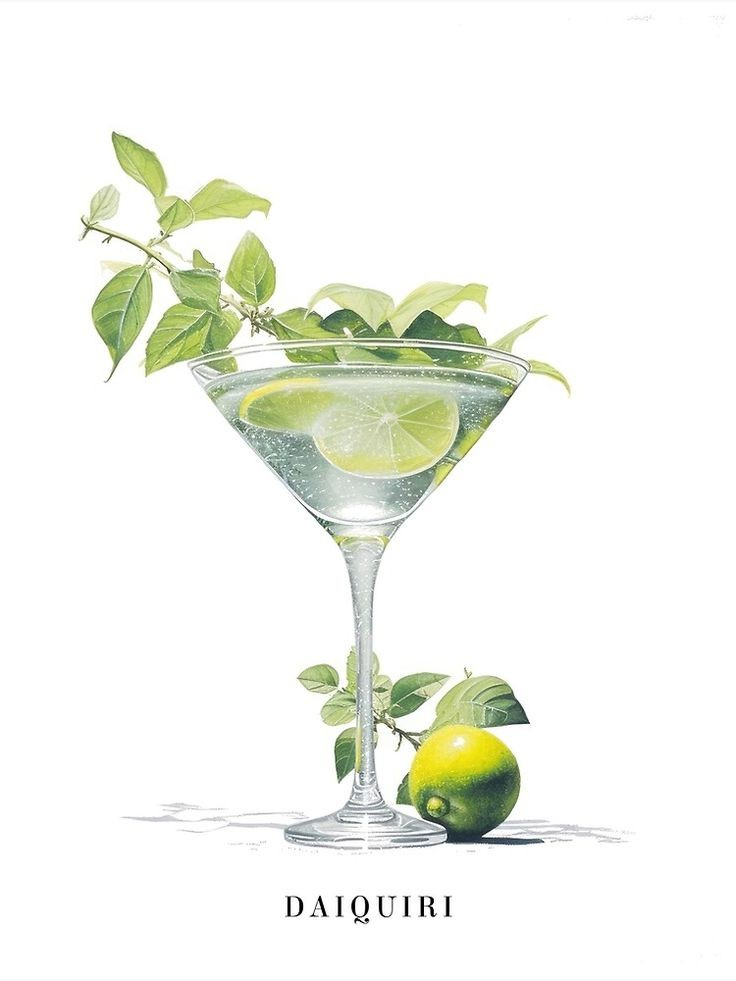

In [144]:
from IPython.display import display, Image
img = Image(filename= "C:\\Users\\flaco\\Documents\\GitHub\\Universidad-MATCOM\\Proyecto_Restaurantes_Bares\\Jupyter\\68a62d8349236bae73b62a14f7f33330.jpg" )
display(img)

In [145]:
Averages = {}
lookfor = ["Cuba Libre"]
for archivo in data:
    for drink in data[archivo]["Menu"]["Beverages"]:
        for element in lookfor:
            if drink == element:
                if not (f"{data[archivo]["Location"]["District"]}, {data[archivo]["Ownership"]}, {drink}" in  Averages):
                    Averages[f"{data[archivo]["Location"]["District"]}, {data[archivo]["Ownership"]}, {drink}"] = [data[archivo]["Menu"]["Beverages"][drink]["Price"]]
                else:
                    Averages[f"{data[archivo]["Location"]["District"]}, {data[archivo]["Ownership"]}, {drink}"].append(data[archivo]["Menu"]["Beverages"][drink]["Price"])
            
from BIBLIOTECA import mediana
for elemento in Averages:
    Averages[elemento]= mediana(Averages[elemento])
Distrito = []
Propiedad = []
Coctel = []
Mediana = []
for elemento in Averages:
    Distrito.append(elemento.split(",")[0])
    Propiedad.append(elemento.split(",")[1])
    Coctel.append(elemento.split(",")[2])
    Mediana.append(Averages[elemento])

dfD = pd.DataFrame({
    "Municipio": Distrito,
    "Propiedad": Propiedad,
    "Coctel": Coctel,
    "Mediana": Mediana
})
dfD

,Municipio,Propiedad,Coctel,Mediana
0,Diez de Octubre,Particular,Cuba Libre,500.0
1,Boyeros,Particular,Cuba Libre,700.0
2,Centro Habana,Particular,Cuba Libre,525.0
3,Cerro,Particular,Cuba Libre,350.0
4,Habana del Este,Particular,Cuba Libre,440.0
5,Habana del Este,Estatal,Cuba Libre,380.0
6,Habana Vieja,Particular,Cuba Libre,680.0
7,La Lisa,Particular,Cuba Libre,390.0
8,Playa,Particular,Cuba Libre,550.0


*Precio promedio del Daiquiri*

In [146]:
fig = px.histogram(dfM, x = "Municipio", y = "Mediana", color = "Propiedad", )
fig.show()

Carlos que es todo un amante de la mezcla de sabores se pregunta, cuantas variantes del Daiquiri se ofrecen en los restaurantes habaneros o si existira un gran numero de ellas. Ya que recordo que su abuela solia contarle que era amante del Daiquiri rosa, una Santiaguera como el lugar de origen del Daiquiri, se propone analizarlo.

*¿Cual de todas las variantes del Daiquiri ofertadas en la carta es la mas vendida?*

In [147]:
Datagrupada = {}

for archivo in data:
    for drink in data[archivo]["Menu"]["Beverages"]:
        if "Daiquiri" in drink:
            if not (data[archivo]["Location"]["District"] + "," + data[archivo]["Ownership"] + "," + drink in  Datagrupada):
                Datagrupada[data[archivo]["Location"]["District"] + "," + data[archivo]["Ownership"] + "," + drink]  = 1
            else:
                Datagrupada[data[archivo]["Location"]["District"] + "," + data[archivo]["Ownership"] + "," + drink]  += 1

Distrito = []
Propiedad = []
Contador = []
coctel = []

for elemento in Datagrupada:
    Distrito.append(elemento.split(",")[0])
    Propiedad.append(elemento.split(",")[1])
    coctel.append(elemento.split(",")[2])
    Contador.append(Datagrupada[elemento])

dfVD = pd.DataFrame({
    "Municipio": Distrito,
    "Propiedad": Propiedad,
    "Coctel" : coctel,
    "Contador": Contador
})

dfVD

,Municipio,Propiedad,Coctel,Contador
0,Diez de Octubre,Particular,Daiquiri,5
1,Diez de Octubre,Particular,Daiquiri Rebelde,1
2,Diez de Octubre,Particular,Daiquiri Saborizado,1
3,Boyeros,Particular,Daiquiri Saborizado,1
4,Boyeros,Particular,Daiquiri,3
5,Boyeros,Particular,Daiquiri frutal,2
6,Centro Habana,Particular,Daiquiri Rebelde,1
7,Centro Habana,Particular,Daiquiri,5
8,Centro Habana,Particular,Daiquiri frutal,1
9,Centro Habana,Particular,Daiquiri de fresa,1


In [148]:
dai = px.pie(dfVD, values = "Contador", names = "Coctel", color = "Coctel")
dai.show()

Para sorpresa de Carlos a pesar de la gran cantidad de variantes de Daiquiri, mediante el analisis descubrio que el Daiquiri de frutas era la variante mas vendida, aunque el numero era realmente pequeño. Pudo notar que estas variantes del coctel pocas veces se presentaban en la carta y que ademas muchas veces no se repetian en otro local. Teniendo en cuenta el analis anterior Carlos ahora puede asegurar que existe muy poca oferta de variantes del Daiquiri en los locales.

Con el analisis general Carlos descubrio que ciertamente para disfrutar de un buen coctel es mas sencillo ir a un lugar cerca del centro de la ciudad, sobre todo el casco historico donde se ofrecen estas bebidas no solo en mayor cantidad de locales, sino tambien por precios mas economicos. Carlos finalmente descubrio que lugar prefiere visitar para degustar de un buen trago. Puede que Carlos decida invitar a su vecina a un refrescante Mojito para entre los balcones de la Habana Vieja, declararle su amor.